In [3]:
#importing everything
import pandas as pd
import numpy as np
#visualization
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
#printing in notebook
%matplotlib inline

#importing the classifier
#from sklearn.svm import SVC as svc
from sklearn.svm import SVC
#importing the evaluation metrics
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
#Libraries, finding the best values
from sklearn.grid_search import GridSearchCV
#for the time
import time
#minmax scaler
from sklearn.preprocessing import MinMaxScaler

from my_classes_01 import Metodos_Thesis as MT
mc=MT()


/Users/Azeem/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/Azeem/anaconda/lib/python3.6/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


# General info:
## Datasets
* One instance it's missing in the testing dataset, it has 22543 values, instead of 22544
* it's missing because the gitgub file already has one value missing 

In [4]:
#nsl
nsl_training=pd.read_csv("./dataset_labeled/nsl_training_labeled.csv")
nsl_testing=pd.read_csv("./dataset_labeled/nsl_testing_labeled.csv")

# PRIMERAS GRAFICAS NSLKDD

# NSLKDD- 5 clases

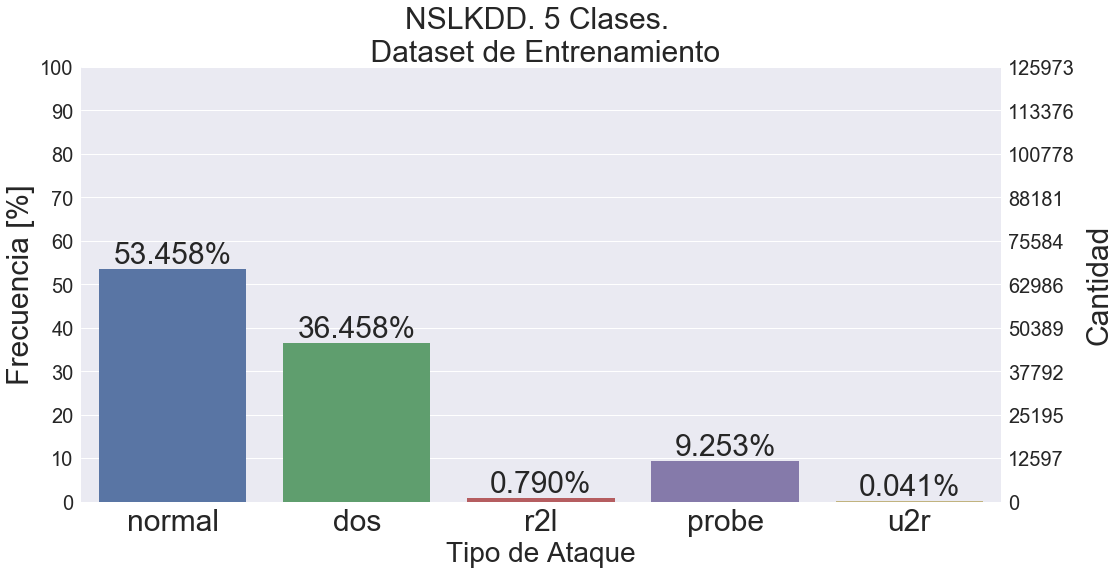

In [5]:
#NSLKDD TRAINING
# Data
dfWIM = nsl_training


# Data Cuantity
ncount = len(dfWIM)

# Figure Size
plt.figure(figsize=(16.5,8))

# Plotting Countblog from Seaborn
ax = sns.countplot(x="Group", data=dfWIM,order=['normal', 'dos', 'r2l', 'probe', 'u2r'])#, order=[0,1])
plt.title('NSLKDD. 5 Clases. \n Dataset de Entrenamiento',fontsize=30)
plt.xlabel("Tipo de Ataque",fontsize=28)
plt.xticks(fontsize=30)

# Make twin axis
ax2=ax.twinx()

# Switch so count axis is on right, frequency on left
# frecuency
ax2.yaxis.tick_left()
# Count
ax.yaxis.tick_right()

# Also switch the labels over
ax.yaxis.set_label_position('right')
ax2.yaxis.set_label_position('left')


ax2.set_ylabel('Frecuencia [%]',labelpad=5,fontsize=30)
ax.set_ylabel('Cantidad',labelpadv=10,fontsize=30)

#Adjusting each one of the labels
#the second axis
for label in ax2.get_yticklabels(): 
    label.set_fontsize(20) 

#the first axis    
for label in ax.get_yticklabels(): 
    label.set_fontsize(20) 
    
#making the box for the percentages    
for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.3f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom',fontsize=30) # set the alignment of the text

    
    
# Use a LinearLocator to ensure the correct number of ticks
ax.yaxis.set_major_locator(ticker.LinearLocator(11))

# Fix the frequency range to 0-100
ax2.set_ylim(0,100)
ax.set_ylim(0,ncount)

# And use a MultipleLocator to ensure a tick spacing of 10
ax2.yaxis.set_major_locator(ticker.MultipleLocator(10))

# Need to turn the grid on ax2 off, otherwise the gridlines end up on top of the bars
ax2.grid(None)
plt.savefig("nsl_attacks_5_classes.png", dpi=300)

# ENSLKDD

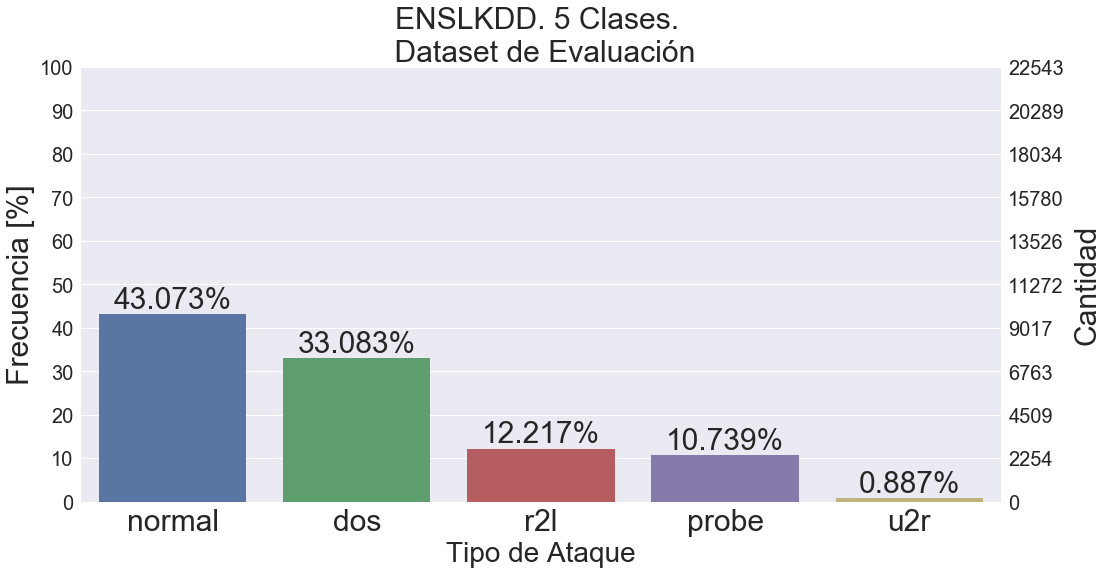

In [6]:
#NSLKDD evaluación
# Data
dfWIM = nsl_testing


# Data Cuantity
ncount = len(dfWIM)

# Figure Size
plt.figure(figsize=(16.5,8))

# Plotting Countblog from Seaborn
ax = sns.countplot(x="Group", data=dfWIM,order=['normal', 'dos', 'r2l', 'probe', 'u2r'])#, order=[0,1])
plt.title('ENSLKDD. 5 Clases. \n Dataset de Evaluación',fontsize=30)
plt.xlabel("Tipo de Ataque",fontsize=28)
plt.xticks(fontsize=30)

# Make twin axis
ax2=ax.twinx()

# Switch so count axis is on right, frequency on left
# frecuency
ax2.yaxis.tick_left()
# Count
ax.yaxis.tick_right()

# Also switch the labels over
ax.yaxis.set_label_position('right')
ax2.yaxis.set_label_position('left')


ax2.set_ylabel('Frecuencia [%]',labelpad=5,fontsize=30)
ax.set_ylabel('Cantidad',labelpad=10,fontsize=30)

#Adjusting each one of the labels
#the second axis
for label in ax2.get_yticklabels(): 
    label.set_fontsize(20) 

#the first axis    
for label in ax.get_yticklabels(): 
    label.set_fontsize(20) 
    
#making the box for the percentages    
for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.3f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom',fontsize=30) # set the alignment of the text

    
    
# Use a LinearLocator to ensure the correct number of ticks
ax.yaxis.set_major_locator(ticker.LinearLocator(11))

# Fix the frequency range to 0-100
ax2.set_ylim(0,100)
ax.set_ylim(0,ncount)

# And use a MultipleLocator to ensure a tick spacing of 10
ax2.yaxis.set_major_locator(ticker.MultipleLocator(10))

# Need to turn the grid on ax2 off, otherwise the gridlines end up on top of the bars
ax2.grid(None)
plt.savefig("enslkdd_attacks_5_classes.png", dpi=300)

# NSL 2 CLASES
# TRAINING

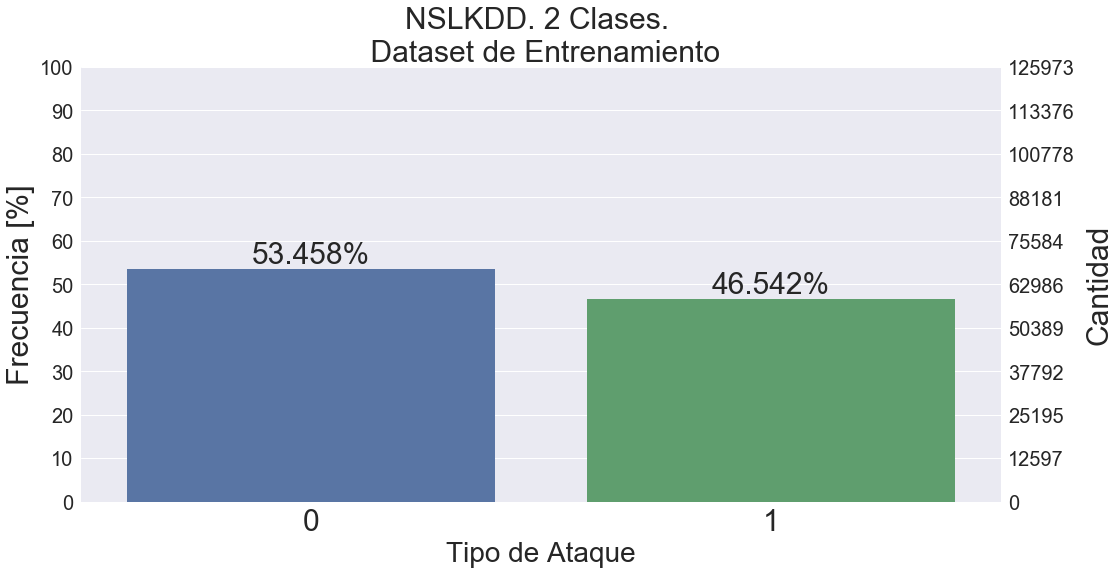

In [12]:
#NSLKDD training
# Data
dfWIM = nsl_training


# Data Cuantity
ncount = len(dfWIM)

# Figure Size
plt.figure(figsize=(16.5,8))

# Plotting Countblog from Seaborn
ax = sns.countplot(x="IndexBinary", data=dfWIM)#, order=[0,1])
plt.title('NSLKDD. 2 Clases. \n Dataset de Entrenamiento',fontsize=30)
plt.xlabel("Tipo de Ataque",fontsize=28)
plt.xticks(fontsize=30)

# Make twin axis
ax2=ax.twinx()

# Switch so count axis is on right, frequency on left
# frecuency
ax2.yaxis.tick_left()
# Count
ax.yaxis.tick_right()

# Also switch the labels over
ax.yaxis.set_label_position('right')
ax2.yaxis.set_label_position('left')


ax2.set_ylabel('Frecuencia [%]',labelpad=5,fontsize=30)
ax.set_ylabel('Cantidad',labelpad=10,fontsize=30)

#Adjusting each one of the labels
#the second axis
for label in ax2.get_yticklabels(): 
    label.set_fontsize(20) 

#the first axis    
for label in ax.get_yticklabels(): 
    label.set_fontsize(20) 
    
#making the box for the percentages    
for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.3f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom',fontsize=30) # set the alignment of the text

    
    
# Use a LinearLocator to ensure the correct number of ticks
ax.yaxis.set_major_locator(ticker.LinearLocator(11))

# Fix the frequency range to 0-100
ax2.set_ylim(0,100)
ax.set_ylim(0,ncount)

# And use a MultipleLocator to ensure a tick spacing of 10
ax2.yaxis.set_major_locator(ticker.MultipleLocator(10))

# Need to turn the grid on ax2 off, otherwise the gridlines end up on top of the bars
ax2.grid(None)
plt.savefig("nslkdd_attacks_2_classes.png", dpi=300)

# NSL TESTING

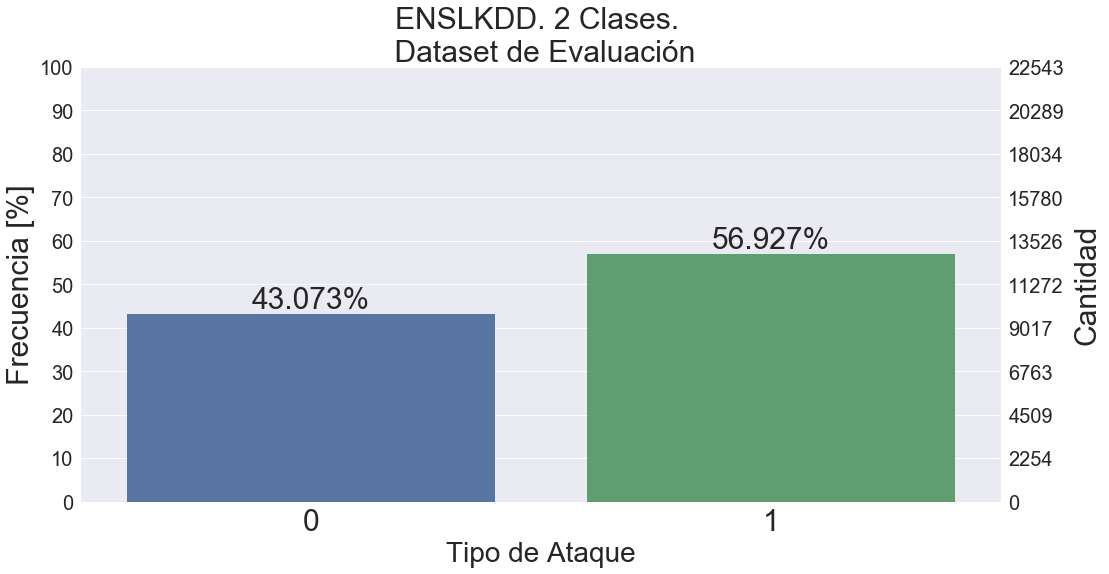

In [11]:
#NSLKDD evaluación
# Data
dfWIM = nsl_testing


# Data Cuantity
ncount = len(dfWIM)

# Figure Size
plt.figure(figsize=(16.5,8))

# Plotting Countblog from Seaborn
ax = sns.countplot(x="IndexBinary", data=dfWIM)#, order=[0,1])
plt.title('ENSLKDD. 2 Clases. \n Dataset de Evaluación',fontsize=30)
plt.xlabel("Tipo de Ataque",fontsize=28)
plt.xticks(fontsize=30)

# Make twin axis
ax2=ax.twinx()

# Switch so count axis is on right, frequency on left
# frecuency
ax2.yaxis.tick_left()
# Count
ax.yaxis.tick_right()

# Also switch the labels over
ax.yaxis.set_label_position('right')
ax2.yaxis.set_label_position('left')


ax2.set_ylabel('Frecuencia [%]',labelpad=5,fontsize=30)
ax.set_ylabel('Cantidad',labelpad=10,fontsize=30)

#Adjusting each one of the labels
#the second axis
for label in ax2.get_yticklabels(): 
    label.set_fontsize(20) 

#the first axis    
for label in ax.get_yticklabels(): 
    label.set_fontsize(20) 
    
#making the box for the percentages    
for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.3f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom',fontsize=30) # set the alignment of the text

    
    
# Use a LinearLocator to ensure the correct number of ticks
ax.yaxis.set_major_locator(ticker.LinearLocator(11))

# Fix the frequency range to 0-100
ax2.set_ylim(0,100)
ax.set_ylim(0,ncount)

# And use a MultipleLocator to ensure a tick spacing of 10
ax2.yaxis.set_major_locator(ticker.MultipleLocator(10))

# Need to turn the grid on ax2 off, otherwise the gridlines end up on top of the bars
ax2.grid(None)
plt.savefig("enslkdd_attacks_2_classes.png", dpi=300)